# Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Uploading data (Xmes_df_Complete)

In [2]:
df_Xmes = pd.read_csv("/mnt/workstation/data/DataXmes_full_ok.csv")
#labels = pd.read_csv("/mnt/workstation/data/labels.csv")

In [3]:
id_cli = df_Xmes['id_cli']
df_Xmes = df_Xmes.drop(['id_cli'], axis=1)

In [23]:
features = pd.DataFrame(df_Xmes.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [24]:
features_f

Index(['cupo_total_tc', 'cuota_de_vivienda', 'ind', 'saldo_no_rot_mdo',
       'ctas_activas', 'ctas_embargadas', 'mediana_nom3', 'mediana_pen3',
       'cupo_tc_mdo', 'estado_civil', 'nivel_academico', 'profesion',
       'ocupacion', 'ciudad_residencia', 'rep_calif_cred'],
      dtype='object')

In [25]:
features_o

Index(['estado_civil_untag_gasto_familiar',
       'nivel_academico_untag_gasto_familiar',
       'profesion_untag_gasto_familiar', 'ocupacion_untag_gasto_familiar',
       'ciudad_residencia_untag_gasto_familiar',
       'rep_calif_cred_untag_gasto_familiar', 'genero_untag'],
      dtype='object')

In [27]:
features_i

Index(['mes', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cant_mora_30_tdc_ult_3m_sf', 'cant_mora_30_consum_ult_3m_sf',
       'codigo_ciiu', 'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr', 'genero',
       'ind_mora_vigente', 'cartera_castigada', 'tenencia_tc', 'tiene_consumo',
       'tiene_crediagil', 'tiene_ctas_activas', 'tiene_ctas_embargadas',
       'pension_fopep', 'tiene_cred_hipo_1', 'tiene_cred_hipo_2'],
      dtype='object')

In [26]:
features_num = features_f.append(features_i)
features_num

Index(['cupo_total_tc', 'cuota_de_vivienda', 'ind', 'saldo_no_rot_mdo',
       'ctas_activas', 'ctas_embargadas', 'mediana_nom3', 'mediana_pen3',
       'cupo_tc_mdo', 'estado_civil', 'nivel_academico', 'profesion',
       'ocupacion', 'ciudad_residencia', 'rep_calif_cred', 'mes', 'mora_max',
       'cant_moras_30_ult_12_meses', 'cant_moras_60_ult_12_meses',
       'cant_moras_90_ult_12_meses', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'codigo_ciiu', 'cant_oblig_tot_sf',
       'cant_cast_ult_12m_sr', 'genero', 'ind_mora_vigente',
       'cartera_castigada', 'tenencia_tc', 'tiene_consumo', 'tiene_crediagil',
       'tiene_ctas_activas', 'tiene_ctas_embargadas', 'pension_fopep',
       'tiene_cred_hipo_1', 'tiene_cred_hipo_2'],
      dtype='object')

In [6]:
df_Xmes[features_o].describe(include='all').T

,count,unique,top,freq
estado_civil_untag_gasto_familiar,10397407,5,SOLTERO,4812911
nivel_academico_untag_gasto_familiar,10397407,6,BACHILLER,4286128
profesion_untag_gasto_familiar,10397407,79,QUIMICA FARMACEUTICA,2898178
ocupacion_untag_gasto_familiar,10397407,10,Empleado,6611586
ciudad_residencia_untag_gasto_familiar,10397407,1513,BOGOTA D.C.,2642397
rep_calif_cred_untag_gasto_familiar,10397407,8,C,2380434
genero_untag,10397407,2,M,5259087


# One-Hot Encoding

In [7]:
df_onehot = pd.get_dummies(df_Xmes, columns=features_o)
list(df_onehot.columns)

['mes',
 'cupo_total_tc',
 'cuota_de_vivienda',
 'ind',
 'mora_max',
 'cant_moras_30_ult_12_meses',
 'cant_moras_60_ult_12_meses',
 'cant_moras_90_ult_12_meses',
 'cant_mora_30_tdc_ult_3m_sf',
 'cant_mora_30_consum_ult_3m_sf',
 'saldo_no_rot_mdo',
 'codigo_ciiu',
 'ctas_activas',
 'ctas_embargadas',
 'mediana_nom3',
 'mediana_pen3',
 'cupo_tc_mdo',
 'cant_oblig_tot_sf',
 'cant_cast_ult_12m_sr',
 'genero',
 'estado_civil',
 'nivel_academico',
 'profesion',
 'ocupacion',
 'ciudad_residencia',
 'rep_calif_cred',
 'ind_mora_vigente',
 'cartera_castigada',
 'tenencia_tc',
 'tiene_consumo',
 'tiene_crediagil',
 'tiene_ctas_activas',
 'tiene_ctas_embargadas',
 'pension_fopep',
 'tiene_cred_hipo_1',
 'tiene_cred_hipo_2',
 'estado_civil_untag_gasto_familiar_CASADO',
 'estado_civil_untag_gasto_familiar_DIVORCIADO',
 'estado_civil_untag_gasto_familiar_SOLTERO',
 'estado_civil_untag_gasto_familiar_UNION LIBRE',
 'estado_civil_untag_gasto_familiar_VIUDO',
 'nivel_academico_untag_gasto_familiar_BACH

In [8]:
df_onehot

,mes,cupo_total_tc,cuota_de_vivienda,ind,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,...,rep_calif_cred_untag_gasto_familiar_A,rep_calif_cred_untag_gasto_familiar_B,rep_calif_cred_untag_gasto_familiar_C,rep_calif_cred_untag_gasto_familiar_D,rep_calif_cred_untag_gasto_familiar_E,rep_calif_cred_untag_gasto_familiar_F,rep_calif_cred_untag_gasto_familiar_G,rep_calif_cred_untag_gasto_familiar_H,genero_untag_F,genero_untag_M
0,1,6600000.0,0.0,3.281244e+06,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2,6600000.0,0.0,3.155679e+06,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,3,6600000.0,0.0,2.775457e+06,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,4,6600000.0,0.0,2.123905e+06,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5,6600000.0,0.0,2.601551e+06,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10397402,7,1700000.0,0.0,7.537400e+05,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10397403,8,1700000.0,0.0,5.397950e+05,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10397404,9,1700000.0,0.0,6.162950e+05,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10397405,10,1700000.0,0.0,5.230038e+05,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [9]:
df_onehot.shape

(10397407, 1659)

# PCA - _Principal Component Analysis_

## Standardization

In [28]:
Estandar = StandardScaler()
#df_temp = df_onehot.iloc[:,100:]
Estandar.fit(df_Xmes[features_num])

df_std = Estandar.transform(df_Xmes[features_num])
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
0,10397407.0,0.0,1.0,-0.42,-0.42,-0.42,0.03,90.39
1,10397407.0,-0.0,1.0,-0.13,-0.13,-0.13,-0.13,668.78
2,10397407.0,-0.0,1.0,-1000.58,-0.04,-0.02,0.03,22.37
3,10397407.0,0.0,1.0,-0.12,-0.12,-0.12,-0.07,591.54
4,10397407.0,-0.0,1.0,-2.54,-0.05,-0.05,-0.05,84.81
5,10397407.0,0.0,1.0,-0.05,-0.05,-0.05,-0.05,137.83
6,10397407.0,0.0,1.0,-0.44,-0.44,-0.44,0.19,193.47
7,10397407.0,0.0,1.0,-0.18,-0.18,-0.18,-0.18,931.22
8,10397407.0,0.0,1.0,-0.30,-0.30,-0.30,-0.03,2121.31
9,10397407.0,0.0,1.0,-0.99,-0.99,0.17,1.33,1.33


In [29]:
autovalores, autovectores = np.linalg.eig(df_std.T.dot(df_std))

In [31]:
PCA = pd.DataFrame(columns = ['Variable','Autovalor'])
PCA['Variable'] = df_Xmes[features_num].columns
PCA['Autovalor'] = autovalores.real
PCA = PCA.sort_values(by=('Autovalor'), ascending=False, ignore_index = True)
PCA['Participacion'] = PCA['Autovalor']/PCA['Autovalor'].sum()*100
PCA['Acumulado'] = PCA['Participacion'].cumsum()
PCA.head(50)

,Variable,Autovalor,Participacion,Acumulado
0,cupo_total_tc,3.753179e+07,1.061684e+01,10.616840
1,cuota_de_vivienda,2.705139e+07,7.652188e+00,18.269028
2,ind,2.090461e+07,5.913413e+00,24.182441
3,saldo_no_rot_mdo,2.067745e+07,5.849154e+00,30.031595
4,ctas_activas,2.033577e+07,5.752500e+00,35.784094
5,ctas_embargadas,1.567034e+07,4.432761e+00,40.216856
6,profesion,1.434738e+07,4.058528e+00,44.275384
7,ciudad_residencia,1.348807e+07,3.815450e+00,48.090834
8,mes,1.277059e+07,3.612493e+00,51.703327
9,cant_moras_90_ult_12_meses,1.174999e+07,3.323789e+00,55.027116


Text(0.5, 1.0, 'Componentes Principales')

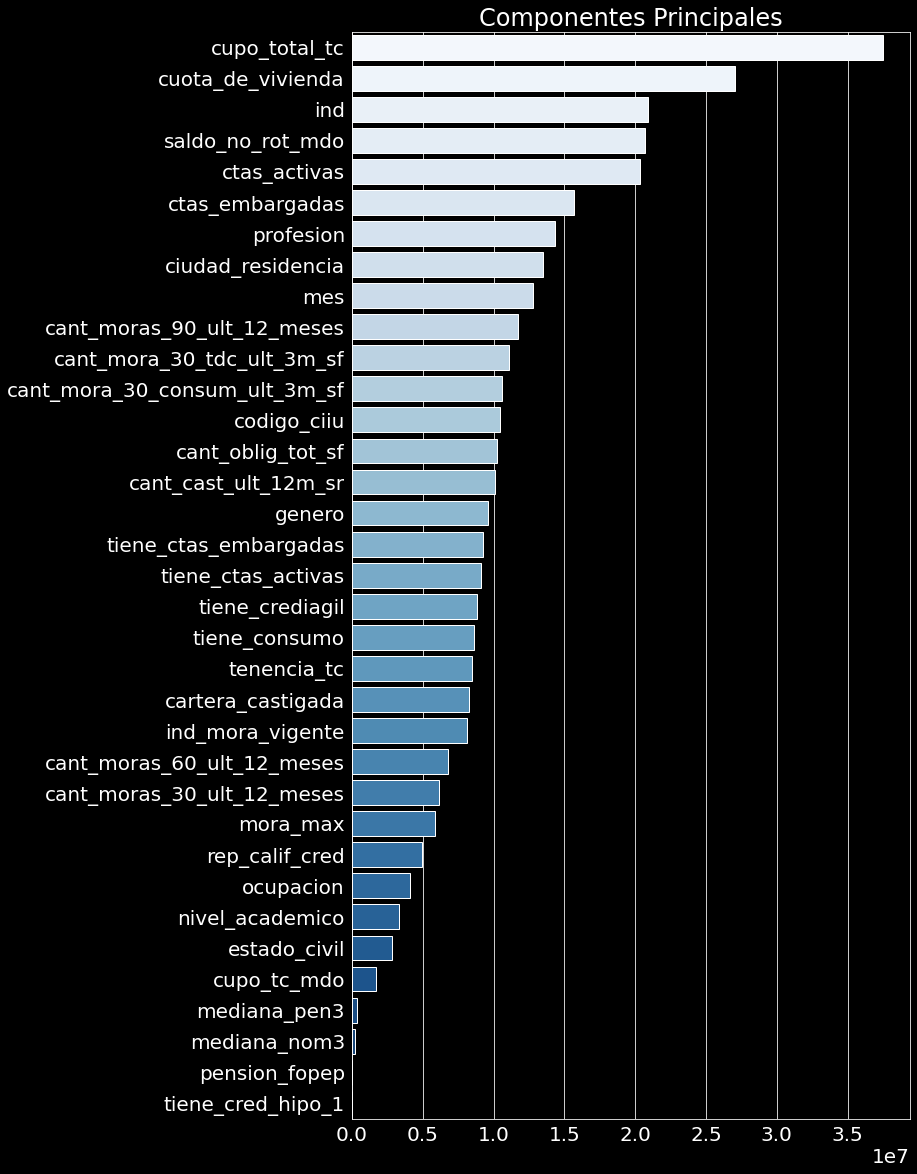

In [32]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.figure(figsize=(10,20))
y = np.array(list(PCA['Variable'].head(35)))
x = np.array(list(PCA['Autovalor'].head(35)))
sns.barplot(x=x, y=y, palette="Blues")
plt.title("Componentes Principales")

Text(0.5, 0, '# Variables')

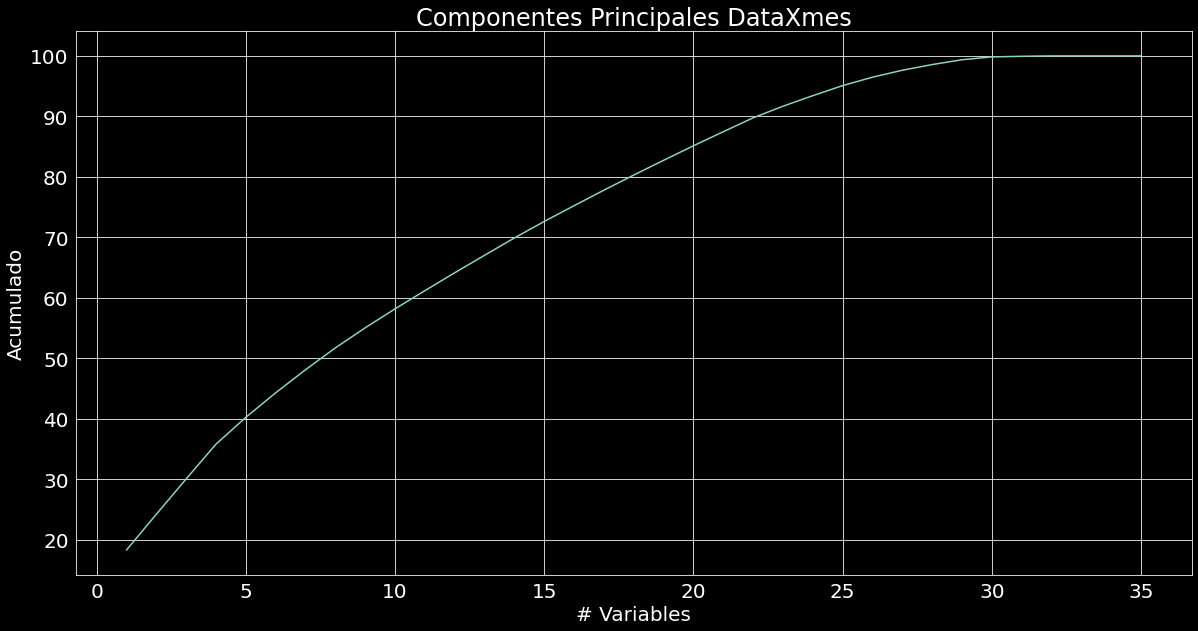

In [33]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.figure(figsize=(20,10))
y = PCA.loc[1:35,'Acumulado']
x = range(1,36)
sns.lineplot(x=x, y=y, palette="YlOrBr")
plt.title("Componentes Principales DataXmes")
plt.xlabel('# Variables')

In [34]:
PCA.to_csv("/mnt/workstation/data/PCA_Xmes.csv", index=False)